In [4]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
np.float = float
np.bool = np.bool_
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [5]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

TypeError: legend() takes 0-2 positional arguments but 3 were given

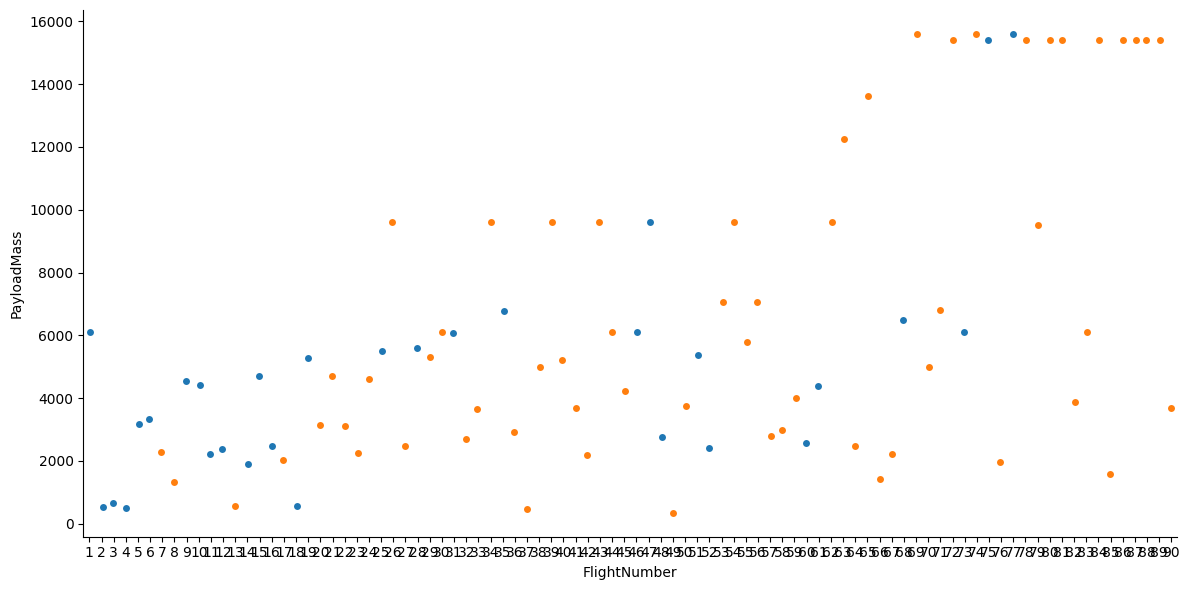

In [11]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue='Class', data=df, kind='strip', height=6, aspect=2)
plt.xlabel("Flight Number",fontsize=6)
plt.ylabel("Pay load Mass (kg)",fontsize=6)
plt.show()

TASK 1: Visualize the relationship between Flight Number and Launch Site

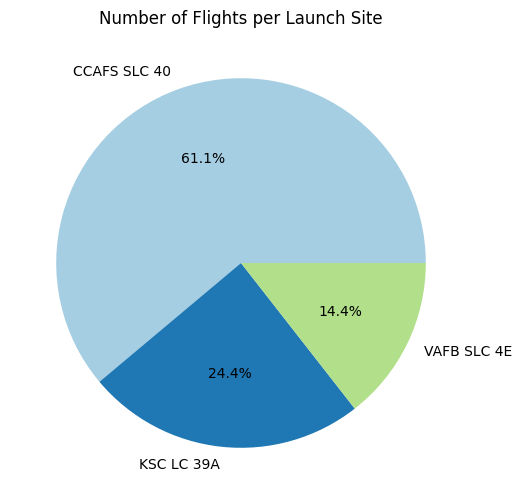

In [8]:
launch_site_counts = df['LaunchSite'].value_counts()
plt.figure(figsize=(10, 6))
launch_site_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Number of Flights per Launch Site')
plt.ylabel('') 
plt.show()

# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

TypeError: legend() takes 0-2 positional arguments but 3 were given

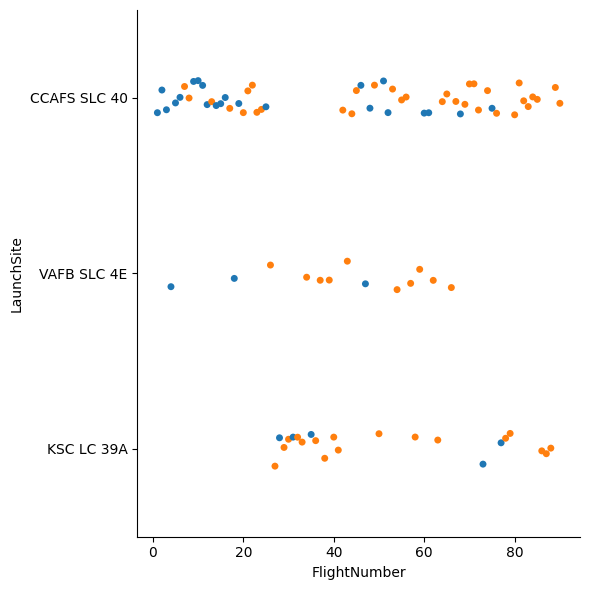

In [12]:
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, height=6, aspect=1)
plt.title('Flight Number vs Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

TypeError: legend() takes 0-2 positional arguments but 3 were given

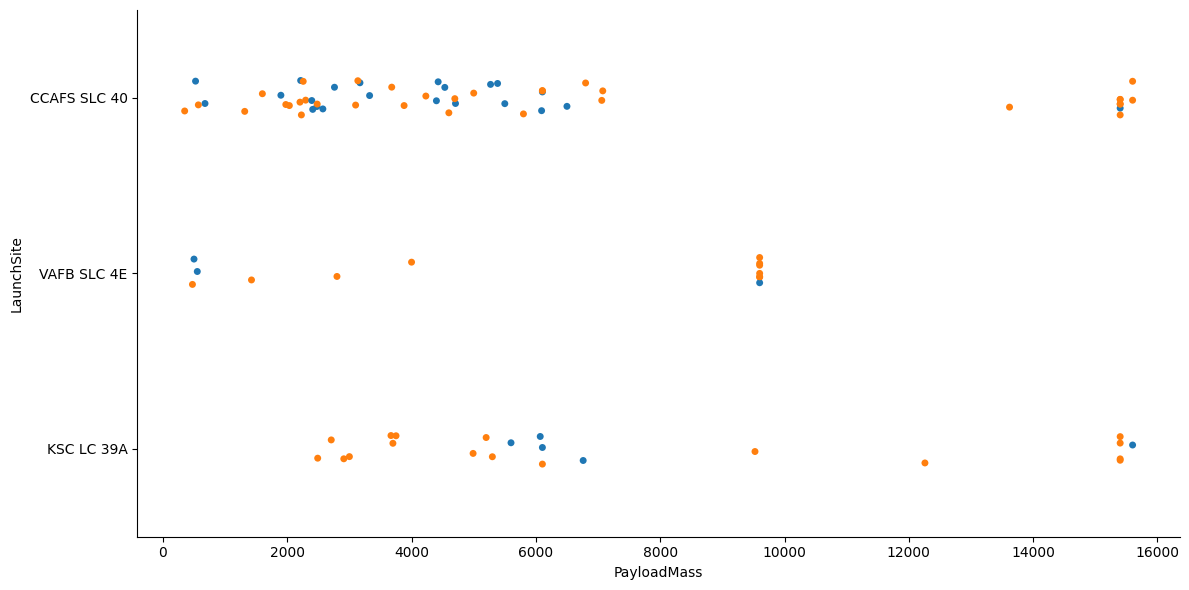

In [24]:
### TASK 2: Visualize the relationship between Payload and Launch Site
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, kind='strip', height=6, aspect=2)
plt.title('PayloadMass vs Launch Site')
plt.xlabel('Payload')
plt.ylabel('Launch Site')

# Show the plot
plt.show()


### TASK  3: Visualize the relationship between success rate of each orbit type


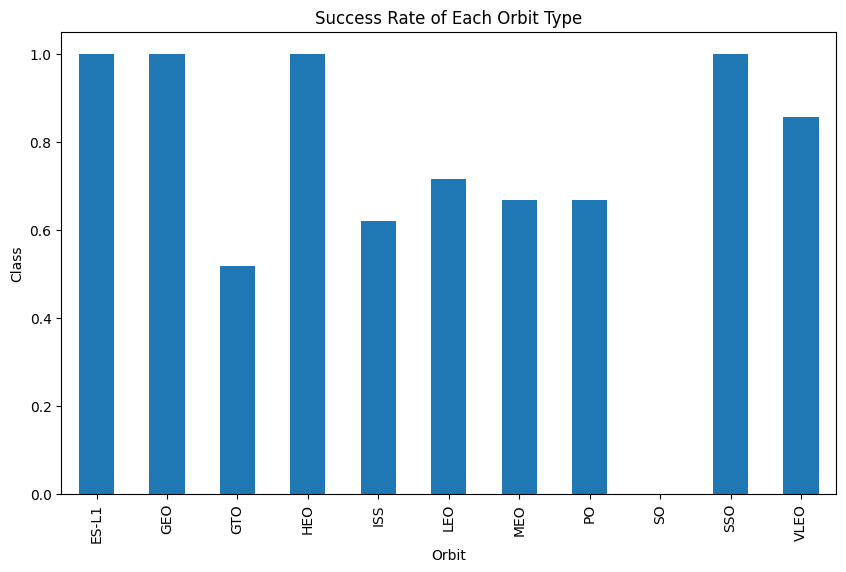

In [15]:
outcome_counts = df['Outcome'].value_counts()

df_bar = df.groupby(['Orbit'])['Class'].mean()
df_bar.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Orbit') # add to x-label to the plot
plt.ylabel('Class') # add y-label to the plot
plt.title('Success Rate of Each Orbit Type') # add title to the plot

plt.show()


TASK  4: Visualize the relationship between FlightNumber and Orbit type

Text(0, 0.5, 'Orbit')

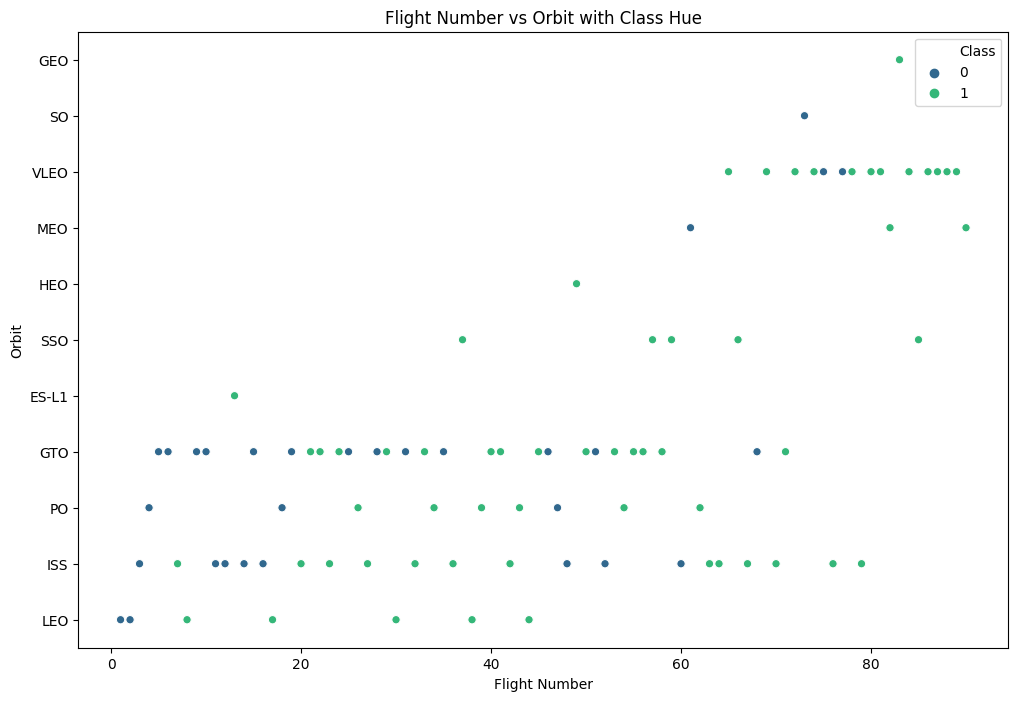

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df, palette='viridis')

# Set plot title and labels
plt.title('Flight Number vs Orbit with Class Hue')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')

### TASK  5: Visualize the relationship between Payload and Orbit type

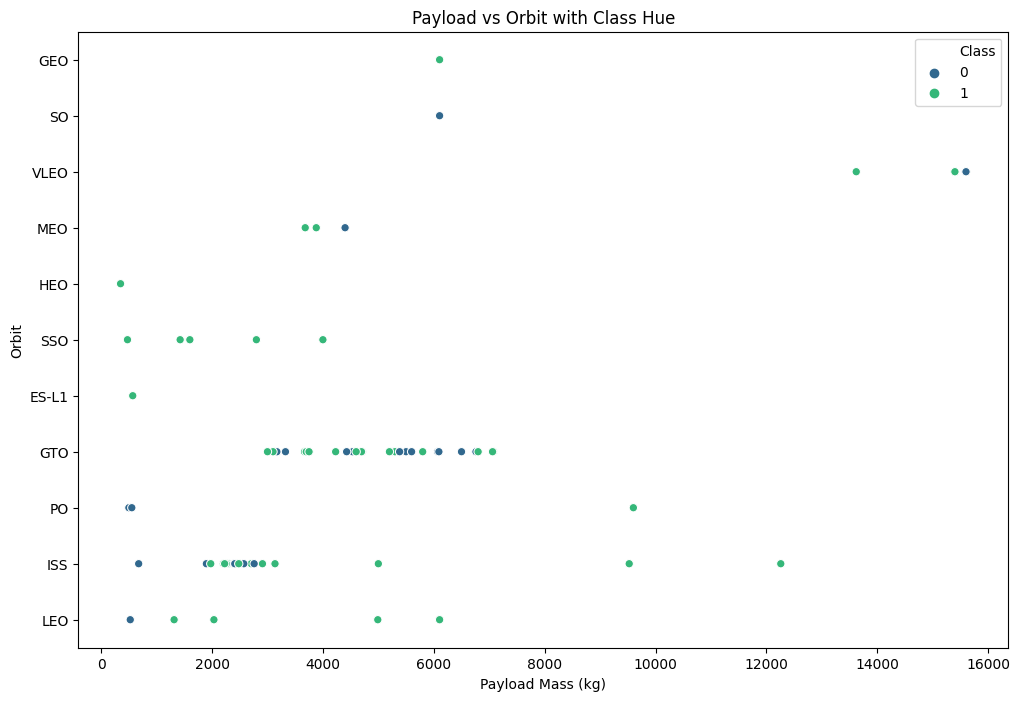

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, palette='viridis')

# Set plot title and labels
plt.title('Payload vs Orbit with Class Hue')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')

# Show the plot
plt.show()

### TASK  6: Visualize the launch success yearly trend

In [37]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [39]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

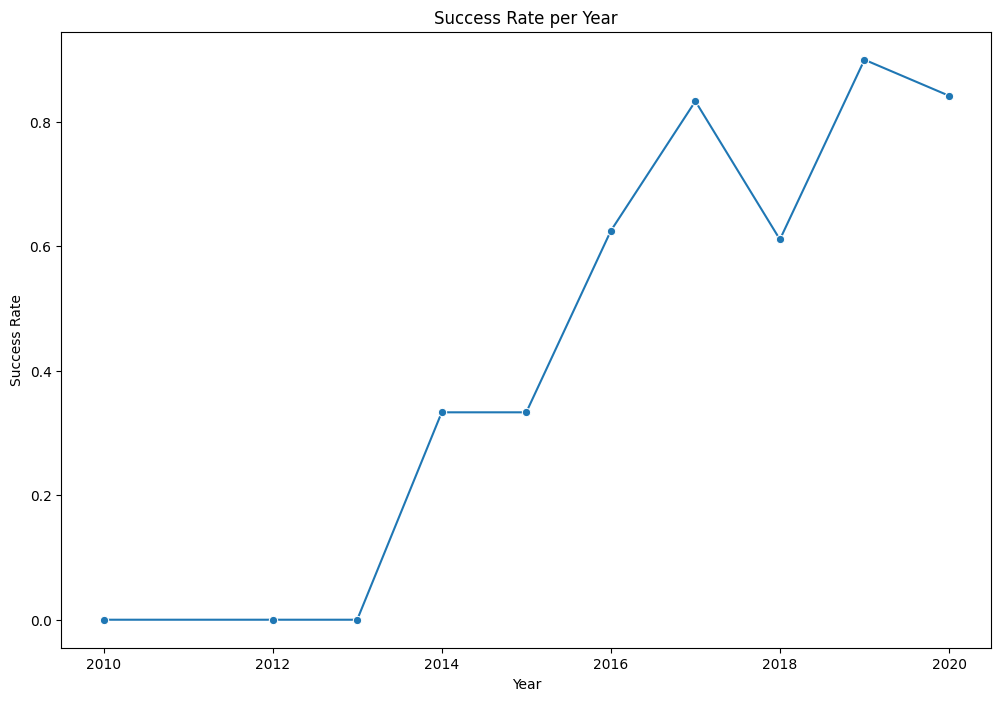

In [38]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate the success rate for each year
success_rate_per_year = df.groupby('Year')['Class'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Class', data=success_rate_per_year, marker='o')

# Set plot title and labels
plt.title('Success Rate per Year')
plt.xlabel('Year')
plt.ylabel('Success Rate')

# Show the plot
plt.show()

In [40]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


TASK  7: Create dummy variables to categorical columns

In [42]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create dummy variables for all categorical columns
df_with_dummies = pd.get_dummies(df, columns=categorical_columns)

# Show the first few rows of the new DataFrame
print(df_with_dummies.head())

   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount   Longitude   Latitude  ...  Serial_B1048  Serial_B1049  \
0            0  -80.577366  28.561857  ...         False         False   
1            0  -80.577366  28.561857  ...         False         False   
2            0  -80.577366  28.561857  ...         False         False   
3            0 -120.610829  34.632093  ...         False         False   
4            0  -80.577366  28.561857  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0         False         False         Fal

In [43]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Cast all numeric columns to float64
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').astype('float64')

# Show the dtypes of the DataFrame to verify the changes
print(df.dtypes)

# Show the first few rows of the new DataFrame
print(df.head())

FlightNumber      float64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights           float64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount       float64
Serial             object
Longitude         float64
Latitude          float64
Class             float64
Year                int32
dtype: object
   FlightNumber  Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0           1.0  2010       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1           2.0  2012       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2           3.0  2013       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3           4.0  2013       Falcon 9   500.000000    PO   VAFB SLC 4E   
4           5.0  2013       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs Land

In [45]:

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define the date range
start_date = '2010-01-01'
end_date = '2020-12-31'

# Filter the DataFrame based on the date range
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Identify categorical columns
categorical_columns = df_filtered.select_dtypes(include=['object']).columns

# Create dummy variables for all categorical columns
df_filtered = pd.get_dummies(df_filtered, columns=categorical_columns)

# Identify numeric columns
numeric_columns = df_filtered.select_dtypes(include=['int64', 'float64']).columns

# Cast all numeric columns to float64
df_filtered[numeric_columns] = df_filtered[numeric_columns].apply(pd.to_numeric, errors='coerce').astype('float64')

# Export the filtered DataFrame to a CSV file
output_csv_path = '/mnt/data/filtered_data.csv'
df_filtered.to_csv(output_csv_path, index=False)

# Print the path to the CSV file
print(f"Filtered data exported to: {output_csv_path}")


OSError: Cannot save file into a non-existent directory: '\mnt\data'

In [47]:
df.shape

(90, 19)

In [51]:
# Select the relevant columns for the features DataFrame
features_columns = ['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 
                    'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']
features_df = df[features_columns]

# Apply one-hot encoding to the specified categorical columns
categorical_columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_df_encoded = pd.get_dummies(features_df, columns=categorical_columns_to_encode)

# Get the total number of columns in the resulting DataFrame
total_columns = features_df_encoded.shape[1]

# Print the total number of columns after one-hot encoding
print(f"Total number of columns after one-hot encoding: {total_columns}")


Total number of columns after one-hot encoding: 80


TypeError: legend() takes 0-2 positional arguments but 3 were given

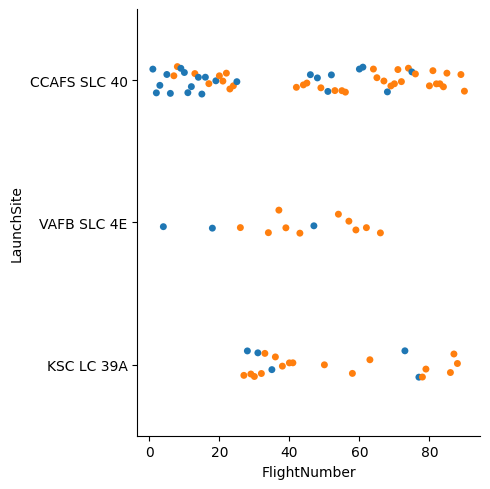

In [57]:
sns.catplot(y="LaunchSite",x="FlightNumber",hue="Class", data=df, aspect = 1)

plt.ylabel("Launch Site",fontsize=15)

plt.xlabel("Flight Number",fontsize=15)

plt.show()